In [1]:
import numpy as np,os
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, power_transform, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.utils import shuffle
from sklearn.metrics import matthews_corrcoef, precision_recall_curve, auc, accuracy_score
import seaborn as sns,matplotlib.pyplot as plt
from scipy.stats import wilcoxon, friedmanchisquare, rankdata
import scikit_posthocs as sp
import matplotlib.pyplot as plt

from library.utils import evaluate, read_data

## Notes
Hypothesis is NB's great performance for noisy data is due to its ability to avoid overfitting. So, this examines regular parameter's value vs performance.
+ As we increase regularizer in LR: the performance (avg. rank) increase for noisy data - But only for mathew. PR-AUC has almost opposite character, U-curve. No imblearn used.
+ For DT: Best for max_depth=3, 2nd best for max_depth=29. No clear pattern. 

In [2]:
DATASETS = ['groovy-1_5_7.csv','jruby-1.4.0.csv','lucene-2.9.0.csv','jruby-1.7.0.preview1.csv','groovy-1_6_BETA_1.csv',
        'derby-10.2.1.6.csv','wicket-1.5.3.csv','camel-2.9.0.csv','camel-1.4.0.csv','activemq-5.8.0.csv']
DATASETS = [f for f in os.listdir("JIRA/") if 'csv' in f]
len(DATASETS)

32

In [3]:
Cs = list(range(3,30,2))+[None]
models = {
    str(c): DecisionTreeClassifier(max_depth=c) for c in  Cs
}
models.keys()

dict_keys(['3', '5', '7', '9', '11', '13', '15', '17', '19', '21', '23', '25', '27', '29', 'None'])

In [4]:
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=42)
def pr_rec_score(y,yp):
    prec, rec, _ = precision_recall_curve(y,yp)
    return auc(rec,prec)
scorers = [matthews_corrcoef,pr_rec_score]

In [5]:
cols = pd.MultiIndex.from_product([models.keys(),[f.__name__ for f in scorers]],names=['clf','metric'])
df = pd.DataFrame(index=DATASETS,columns=cols)

In [6]:
for k in models:
    print(k)
    for d in DATASETS:
        X,y_noisy,y_real = read_data(d,stats=True)
        r = evaluate(models[k],X,y_noisy,y_real,cv,scorers)
        for f in r:
            df.loc[d,(k,f)] = r[f].mean()

3
activemq-5.8.0.csv noise:0.058, imb:15.847,203,3217, Shape:(3420, 65)
groovy-1_6_BETA_1.csv noise:0.128, imb:6.017,117,704, Shape:(821, 65)
activemq-5.3.0.csv noise:0.094, imb:15.669,142,2225, Shape:(2367, 65)


/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


wicket-1.3.0-incubating-beta-1.csv noise:0.164, imb:4.806,288,1384, Shape:(1672, 65)
jruby-1.1.csv noise:0.175, imb:3.540,161,570, Shape:(731, 65)
jruby-1.4.0.csv noise:0.190, imb:3.890,200,778, Shape:(978, 65)
lucene-2.3.0.csv noise:0.204, imb:4.031,160,645, Shape:(805, 65)
hbase-0.95.2.csv noise:0.260, imb:15.088,114,1720, Shape:(1834, 65)


/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


lucene-3.0.0.csv noise:0.185, imb:6.037,190,1147, Shape:(1337, 65)
camel-2.9.0.csv noise:0.044, imb:34.600,200,6920, Shape:(7120, 65)


/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


wicket-1.5.3.csv noise:0.064, imb:26.720,93,2485, Shape:(2578, 65)


/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = 

lucene-3.1.csv noise:0.120, imb:7.477,331,2475, Shape:(2806, 65)
groovy-1_6_BETA_2.csv noise:0.096, imb:7.583,103,781, Shape:(884, 65)
activemq-5.2.0.csv noise:0.113, imb:12.247,154,1886, Shape:(2040, 65)


/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


groovy-1_5_7.csv noise:0.085, imb:8.463,80,677, Shape:(757, 65)
hbase-0.95.0.csv noise:0.234, imb:17.341,91,1578, Shape:(1669, 65)


/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = 

camel-2.11.0.csv noise:0.024, imb:43.230,200,8646, Shape:(8846, 65)


/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = 

jruby-1.7.0.preview1.csv noise:0.099, imb:8.902,163,1451, Shape:(1614, 65)
hive-0.10.0.csv noise:0.126, imb:29.000,52,1508, Shape:(1560, 65)


/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = 

camel-2.10.0.csv noise:0.053, imb:24.447,311,7603, Shape:(7914, 65)


/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


derby-10.2.1.6.csv noise:0.290, imb:9.906,180,1783, Shape:(1963, 65)


/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


jruby-1.5.0.csv noise:0.218, imb:3.098,276,855, Shape:(1131, 65)
derby-10.3.1.4.csv noise:0.267, imb:13.051,157,2049, Shape:(2206, 65)


/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


lucene-2.9.0.csv noise:0.226, imb:3.921,278,1090, Shape:(1368, 65)
hbase-0.94.0.csv noise:0.207, imb:14.348,69,990, Shape:(1059, 65)


/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


camel-1.4.0.csv noise:0.281, imb:3.174,363,1152, Shape:(1515, 65)
activemq-5.1.0.csv noise:0.083, imb:13.173,139,1831, Shape:(1970, 65)


/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


activemq-5.0.0.csv noise:0.139, imb:21.976,82,1802, Shape:(1884, 65)


/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


derby-10.5.1.1.csv noise:0.126, imb:14.028,180,2525, Shape:(2705, 65)
wicket-1.3.0-beta2.csv noise:0.184, imb:4.780,305,1458, Shape:(1763, 65)
hive-0.12.0.csv noise:0.087, imb:56.870,46,2616, Shape:(2662, 65)


/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = 

hive-0.9.0.csv noise:0.179, imb:25.717,53,1363, Shape:(1416, 65)
5
activemq-5.8.0.csv noise:0.058, imb:15.847,203,3217, Shape:(3420, 65)
groovy-1_6_BETA_1.csv noise:0.128, imb:6.017,117,704, Shape:(821, 65)
activemq-5.3.0.csv noise:0.094, imb:15.669,142,2225, Shape:(2367, 65)
wicket-1.3.0-incubating-beta-1.csv noise:0.164, imb:4.806,288,1384, Shape:(1672, 65)
jruby-1.1.csv noise:0.175, imb:3.540,161,570, Shape:(731, 65)
jruby-1.4.0.csv noise:0.190, imb:3.890,200,778, Shape:(978, 65)
lucene-2.3.0.csv noise:0.204, imb:4.031,160,645, Shape:(805, 65)
hbase-0.95.2.csv noise:0.260, imb:15.088,114,1720, Shape:(1834, 65)
lucene-3.0.0.csv noise:0.185, imb:6.037,190,1147, Shape:(1337, 65)
camel-2.9.0.csv noise:0.044, imb:34.600,200,6920, Shape:(7120, 65)
wicket-1.5.3.csv noise:0.064, imb:26.720,93,2485, Shape:(2578, 65)


/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


lucene-3.1.csv noise:0.120, imb:7.477,331,2475, Shape:(2806, 65)
groovy-1_6_BETA_2.csv noise:0.096, imb:7.583,103,781, Shape:(884, 65)
activemq-5.2.0.csv noise:0.113, imb:12.247,154,1886, Shape:(2040, 65)
groovy-1_5_7.csv noise:0.085, imb:8.463,80,677, Shape:(757, 65)
hbase-0.95.0.csv noise:0.234, imb:17.341,91,1578, Shape:(1669, 65)


/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


camel-2.11.0.csv noise:0.024, imb:43.230,200,8646, Shape:(8846, 65)


/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


jruby-1.7.0.preview1.csv noise:0.099, imb:8.902,163,1451, Shape:(1614, 65)
hive-0.10.0.csv noise:0.126, imb:29.000,52,1508, Shape:(1560, 65)
camel-2.10.0.csv noise:0.053, imb:24.447,311,7603, Shape:(7914, 65)
derby-10.2.1.6.csv noise:0.290, imb:9.906,180,1783, Shape:(1963, 65)
jruby-1.5.0.csv noise:0.218, imb:3.098,276,855, Shape:(1131, 65)
derby-10.3.1.4.csv noise:0.267, imb:13.051,157,2049, Shape:(2206, 65)
lucene-2.9.0.csv noise:0.226, imb:3.921,278,1090, Shape:(1368, 65)
hbase-0.94.0.csv noise:0.207, imb:14.348,69,990, Shape:(1059, 65)
camel-1.4.0.csv noise:0.281, imb:3.174,363,1152, Shape:(1515, 65)
activemq-5.1.0.csv noise:0.083, imb:13.173,139,1831, Shape:(1970, 65)
activemq-5.0.0.csv noise:0.139, imb:21.976,82,1802, Shape:(1884, 65)


/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


derby-10.5.1.1.csv noise:0.126, imb:14.028,180,2525, Shape:(2705, 65)


/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


wicket-1.3.0-beta2.csv noise:0.184, imb:4.780,305,1458, Shape:(1763, 65)
hive-0.12.0.csv noise:0.087, imb:56.870,46,2616, Shape:(2662, 65)


/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = 

hive-0.9.0.csv noise:0.179, imb:25.717,53,1363, Shape:(1416, 65)


/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


7
activemq-5.8.0.csv noise:0.058, imb:15.847,203,3217, Shape:(3420, 65)
groovy-1_6_BETA_1.csv noise:0.128, imb:6.017,117,704, Shape:(821, 65)
activemq-5.3.0.csv noise:0.094, imb:15.669,142,2225, Shape:(2367, 65)
wicket-1.3.0-incubating-beta-1.csv noise:0.164, imb:4.806,288,1384, Shape:(1672, 65)
jruby-1.1.csv noise:0.175, imb:3.540,161,570, Shape:(731, 65)
jruby-1.4.0.csv noise:0.190, imb:3.890,200,778, Shape:(978, 65)
lucene-2.3.0.csv noise:0.204, imb:4.031,160,645, Shape:(805, 65)
hbase-0.95.2.csv noise:0.260, imb:15.088,114,1720, Shape:(1834, 65)
lucene-3.0.0.csv noise:0.185, imb:6.037,190,1147, Shape:(1337, 65)
camel-2.9.0.csv noise:0.044, imb:34.600,200,6920, Shape:(7120, 65)
wicket-1.5.3.csv noise:0.064, imb:26.720,93,2485, Shape:(2578, 65)
lucene-3.1.csv noise:0.120, imb:7.477,331,2475, Shape:(2806, 65)
groovy-1_6_BETA_2.csv noise:0.096, imb:7.583,103,781, Shape:(884, 65)
activemq-5.2.0.csv noise:0.113, imb:12.247,154,1886, Shape:(2040, 65)
groovy-1_5_7.csv noise:0.085, imb:8.46

/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


camel-2.11.0.csv noise:0.024, imb:43.230,200,8646, Shape:(8846, 65)
jruby-1.7.0.preview1.csv noise:0.099, imb:8.902,163,1451, Shape:(1614, 65)
hive-0.10.0.csv noise:0.126, imb:29.000,52,1508, Shape:(1560, 65)


/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


camel-2.10.0.csv noise:0.053, imb:24.447,311,7603, Shape:(7914, 65)
derby-10.2.1.6.csv noise:0.290, imb:9.906,180,1783, Shape:(1963, 65)
jruby-1.5.0.csv noise:0.218, imb:3.098,276,855, Shape:(1131, 65)
derby-10.3.1.4.csv noise:0.267, imb:13.051,157,2049, Shape:(2206, 65)
lucene-2.9.0.csv noise:0.226, imb:3.921,278,1090, Shape:(1368, 65)
hbase-0.94.0.csv noise:0.207, imb:14.348,69,990, Shape:(1059, 65)
camel-1.4.0.csv noise:0.281, imb:3.174,363,1152, Shape:(1515, 65)
activemq-5.1.0.csv noise:0.083, imb:13.173,139,1831, Shape:(1970, 65)
activemq-5.0.0.csv noise:0.139, imb:21.976,82,1802, Shape:(1884, 65)
derby-10.5.1.1.csv noise:0.126, imb:14.028,180,2525, Shape:(2705, 65)
wicket-1.3.0-beta2.csv noise:0.184, imb:4.780,305,1458, Shape:(1763, 65)
hive-0.12.0.csv noise:0.087, imb:56.870,46,2616, Shape:(2662, 65)


/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


hive-0.9.0.csv noise:0.179, imb:25.717,53,1363, Shape:(1416, 65)
9
activemq-5.8.0.csv noise:0.058, imb:15.847,203,3217, Shape:(3420, 65)
groovy-1_6_BETA_1.csv noise:0.128, imb:6.017,117,704, Shape:(821, 65)
activemq-5.3.0.csv noise:0.094, imb:15.669,142,2225, Shape:(2367, 65)
wicket-1.3.0-incubating-beta-1.csv noise:0.164, imb:4.806,288,1384, Shape:(1672, 65)
jruby-1.1.csv noise:0.175, imb:3.540,161,570, Shape:(731, 65)
jruby-1.4.0.csv noise:0.190, imb:3.890,200,778, Shape:(978, 65)
lucene-2.3.0.csv noise:0.204, imb:4.031,160,645, Shape:(805, 65)
hbase-0.95.2.csv noise:0.260, imb:15.088,114,1720, Shape:(1834, 65)
lucene-3.0.0.csv noise:0.185, imb:6.037,190,1147, Shape:(1337, 65)
camel-2.9.0.csv noise:0.044, imb:34.600,200,6920, Shape:(7120, 65)
wicket-1.5.3.csv noise:0.064, imb:26.720,93,2485, Shape:(2578, 65)
lucene-3.1.csv noise:0.120, imb:7.477,331,2475, Shape:(2806, 65)
groovy-1_6_BETA_2.csv noise:0.096, imb:7.583,103,781, Shape:(884, 65)
activemq-5.2.0.csv noise:0.113, imb:12.247,

/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


hive-0.9.0.csv noise:0.179, imb:25.717,53,1363, Shape:(1416, 65)
11
activemq-5.8.0.csv noise:0.058, imb:15.847,203,3217, Shape:(3420, 65)
groovy-1_6_BETA_1.csv noise:0.128, imb:6.017,117,704, Shape:(821, 65)
activemq-5.3.0.csv noise:0.094, imb:15.669,142,2225, Shape:(2367, 65)
wicket-1.3.0-incubating-beta-1.csv noise:0.164, imb:4.806,288,1384, Shape:(1672, 65)
jruby-1.1.csv noise:0.175, imb:3.540,161,570, Shape:(731, 65)
jruby-1.4.0.csv noise:0.190, imb:3.890,200,778, Shape:(978, 65)
lucene-2.3.0.csv noise:0.204, imb:4.031,160,645, Shape:(805, 65)
hbase-0.95.2.csv noise:0.260, imb:15.088,114,1720, Shape:(1834, 65)
lucene-3.0.0.csv noise:0.185, imb:6.037,190,1147, Shape:(1337, 65)
camel-2.9.0.csv noise:0.044, imb:34.600,200,6920, Shape:(7120, 65)
wicket-1.5.3.csv noise:0.064, imb:26.720,93,2485, Shape:(2578, 65)
lucene-3.1.csv noise:0.120, imb:7.477,331,2475, Shape:(2806, 65)
groovy-1_6_BETA_2.csv noise:0.096, imb:7.583,103,781, Shape:(884, 65)
activemq-5.2.0.csv noise:0.113, imb:12.247

/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


13
activemq-5.8.0.csv noise:0.058, imb:15.847,203,3217, Shape:(3420, 65)
groovy-1_6_BETA_1.csv noise:0.128, imb:6.017,117,704, Shape:(821, 65)
activemq-5.3.0.csv noise:0.094, imb:15.669,142,2225, Shape:(2367, 65)
wicket-1.3.0-incubating-beta-1.csv noise:0.164, imb:4.806,288,1384, Shape:(1672, 65)
jruby-1.1.csv noise:0.175, imb:3.540,161,570, Shape:(731, 65)
jruby-1.4.0.csv noise:0.190, imb:3.890,200,778, Shape:(978, 65)
lucene-2.3.0.csv noise:0.204, imb:4.031,160,645, Shape:(805, 65)
hbase-0.95.2.csv noise:0.260, imb:15.088,114,1720, Shape:(1834, 65)
lucene-3.0.0.csv noise:0.185, imb:6.037,190,1147, Shape:(1337, 65)
camel-2.9.0.csv noise:0.044, imb:34.600,200,6920, Shape:(7120, 65)
wicket-1.5.3.csv noise:0.064, imb:26.720,93,2485, Shape:(2578, 65)
lucene-3.1.csv noise:0.120, imb:7.477,331,2475, Shape:(2806, 65)
groovy-1_6_BETA_2.csv noise:0.096, imb:7.583,103,781, Shape:(884, 65)
activemq-5.2.0.csv noise:0.113, imb:12.247,154,1886, Shape:(2040, 65)
groovy-1_5_7.csv noise:0.085, imb:8.4

/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/sklearn/metrics/_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


hive-0.9.0.csv noise:0.179, imb:25.717,53,1363, Shape:(1416, 65)
23
activemq-5.8.0.csv noise:0.058, imb:15.847,203,3217, Shape:(3420, 65)
groovy-1_6_BETA_1.csv noise:0.128, imb:6.017,117,704, Shape:(821, 65)
activemq-5.3.0.csv noise:0.094, imb:15.669,142,2225, Shape:(2367, 65)
wicket-1.3.0-incubating-beta-1.csv noise:0.164, imb:4.806,288,1384, Shape:(1672, 65)
jruby-1.1.csv noise:0.175, imb:3.540,161,570, Shape:(731, 65)
jruby-1.4.0.csv noise:0.190, imb:3.890,200,778, Shape:(978, 65)
lucene-2.3.0.csv noise:0.204, imb:4.031,160,645, Shape:(805, 65)
hbase-0.95.2.csv noise:0.260, imb:15.088,114,1720, Shape:(1834, 65)
lucene-3.0.0.csv noise:0.185, imb:6.037,190,1147, Shape:(1337, 65)
camel-2.9.0.csv noise:0.044, imb:34.600,200,6920, Shape:(7120, 65)
wicket-1.5.3.csv noise:0.064, imb:26.720,93,2485, Shape:(2578, 65)
lucene-3.1.csv noise:0.120, imb:7.477,331,2475, Shape:(2806, 65)
groovy-1_6_BETA_2.csv noise:0.096, imb:7.583,103,781, Shape:(884, 65)
activemq-5.2.0.csv noise:0.113, imb:12.247

In [7]:
df.to_csv("DT-C vs Perf.csv")

## Analysis

In [8]:
tmp = df.drop(columns=['matthews_corrcoef'],axis=1,level=1)
tmp

clf,3,5,7,9,11,13,15,17,19,21,23,25,27,29,None
metric,pr_rec_score,pr_rec_score,pr_rec_score,pr_rec_score,pr_rec_score,pr_rec_score,pr_rec_score,pr_rec_score,pr_rec_score,pr_rec_score,pr_rec_score,pr_rec_score,pr_rec_score,pr_rec_score,pr_rec_score
activemq-5.8.0.csv,0.30358,0.26601,0.251222,0.265162,0.228441,0.231059,0.247673,0.25136,0.276511,0.249948,0.240002,0.24309,0.236654,0.269086,0.257666
groovy-1_6_BETA_1.csv,0.37339,0.390777,0.369798,0.336298,0.356778,0.378455,0.397801,0.368419,0.343423,0.403135,0.348989,0.367461,0.366292,0.390476,0.349187
activemq-5.3.0.csv,0.399706,0.386944,0.347926,0.330962,0.328622,0.336486,0.378342,0.378529,0.372189,0.358658,0.374469,0.369781,0.374443,0.389374,0.351576
wicket-1.3.0-incubating-beta-1.csv,0.359192,0.285055,0.350315,0.318253,0.351275,0.353826,0.366153,0.340259,0.382614,0.370359,0.353481,0.375032,0.382174,0.395971,0.379528
jruby-1.1.csv,0.637417,0.43195,0.403953,0.495757,0.493464,0.508699,0.517764,0.478975,0.494834,0.515949,0.505601,0.526173,0.476398,0.524807,0.494165
jruby-1.4.0.csv,0.527568,0.434868,0.435269,0.424858,0.459741,0.479559,0.459758,0.460839,0.468022,0.460182,0.484862,0.469226,0.471705,0.471329,0.464086
lucene-2.3.0.csv,0.627124,0.551352,0.526133,0.541618,0.525931,0.545082,0.55766,0.590046,0.571817,0.588425,0.579852,0.564399,0.572269,0.589087,0.573292
hbase-0.95.2.csv,0.509948,0.401971,0.381028,0.383771,0.403875,0.405268,0.397273,0.404871,0.392671,0.403982,0.425943,0.400107,0.407935,0.414743,0.386348
lucene-3.0.0.csv,0.285028,0.278873,0.272984,0.278641,0.312894,0.299643,0.325278,0.344194,0.301502,0.331788,0.293946,0.334867,0.318758,0.339603,0.336036


In [9]:
mat = tmp.droplevel(1,axis=1)
print(mat.shape)

(32, 15)


In [10]:
res = mat.copy()
for d in mat.index:
    res.loc[d] = rankdata(1-mat.loc[d])
res

clf,3,5,7,9,11,13,15,17,19,21,23,25,27,29,None
activemq-5.8.0.csv,1,4,8,5,15,14,10,7,2,9,12,11,13,3,6
groovy-1_6_BETA_1.csv,6,3,7,15,11,5,2,8,14,1,13,9,10,4,12
activemq-5.3.0.csv,1,3,12,14,15,13,5,4,8,10,6,9,7,2,11
wicket-1.3.0-incubating-beta-1.csv,8,15,12,14,11,9,7,13,2,6,10,5,3,1,4
jruby-1.1.csv,1,14,15,8,11,6,4,12,9,5,7,2,13,3,10
jruby-1.4.0.csv,1,14,13,15,12,3,11,9,7,10,2,6,4,5,8
lucene-2.3.0.csv,1,11,14,13,15,12,10,2,8,4,5,9,7,3,6
hbase-0.95.2.csv,1,9,15,14,8,5,11,6,12,7,2,10,4,3,13
lucene-3.0.0.csv,12,13,15,14,8,10,6,1,9,5,11,4,7,2,3
camel-2.9.0.csv,1,2,4,7,9,12,13,15,14,11,10,8,5,6,3


In [20]:
b=res.mean().sort_values()
b

clf
3        3.34375
29       5.06250
None     6.28125
23       6.87500
5        7.09375
25       7.12500
27       7.37500
21       7.84375
19       8.21875
17       8.59375
15       8.81250
13      10.06250
7       10.50000
9       11.37500
11      11.43750
dtype: float64

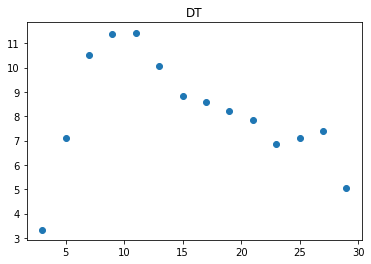

In [21]:
plt.title("DT")
b = b.drop(index=['None'])
plt.scatter(list(map(float,b.index)),b.values);